<a href="https://colab.research.google.com/github/SecurityCyberGeek/MAS-DSE-LLM_Student_Improvement/blob/main/Math_3B_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 3B DATA COMPARISONS
## Capstone - Using LLMs for Student Outcome
- Tim Harmon and Clinton Anderson, Cohort 10
- UCSD DSE 260B June 7, 2025

This notebook uses the Cleaned and Joined Vocareum data: Math 3B Grades, Anonymized Student Data (with HW), and Grades-3B-May12-SP25 (With Tests and Midterms) on 'Vocareum ID'.

Uses the created graphs use "ai-chatTotal.csv" for AI-users, and "no-ai-chatTotal.csv" for students who did not interact with the tutorial portion of the system.


REFERENCES:
- ChatGPT assistance for visualizations (https://openai.com/)

## Prepare Environment for Import
Use Google Collab to work on the environment with multiple developers.

### Imports

In [ ]:
import pandas as pd
import enum
import numpy as np
import string
import random

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For t-tests and p-values
from scipy.stats import ttest_ind

### Connect to Google Drive (change to local drive if using local Jupyter Notebook)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### For shared Google Drive:
- Ensure the following variables are in an accessible location
- This will be the owner's local drive, or another developers "shared' drive.

In [ ]:
# EXAMPLE
# enum  LOCATION = {
#     LOCAL = '/content/drive/My Drive/DSE_260_Capstone/Math 3B/',
#     SHARED = '/content/drive/Shared drives/DSE 260 Capstone/Math 3B'
# }

### Mount Input

- A user may not be able to access a folder from Google Drive (i.e., DSE 260 Capstone)
- E.g., "FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/DSE_260_Capstone/Charts for Students - Normal MVP Data Set.csv'"


- If it cannot be accessed:
1) Ensure that it is saved as a CSV (Export to CSV in Excel or Open Office)
2) Find the file in the shared drive, right-click => Organize => create a shortcut.
3) Then paste the shortcut to your personal drive (My Drive (main), no other folder).

4) ** NOTE IF THERE ARE UNDERSCORES IN THE NAME - The working one here has underscores**

In [ ]:
file_path_ai = '/content/drive/My Drive/DSE_260_Capstone/Math 3B/capstone_ai_chatTotal.csv' # HW1.1 - 2.5, AI Users only
file_path_no_ai = '/content/drive/My Drive/DSE_260_Capstone/Math 3B/capstone_no_ai_chatTotal.csv' # HW1.1 - 2.5, Non-AI Users

In [ ]:
ai_df = pd.read_csv(file_path_ai)
none_df = pd.read_csv(file_path_no_ai)

In [ ]:
ai_df.head(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW GPA_Percent,HW Letter Grade,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount
0,4,178739370,10.0,9.0,9.0,10.0,6.0,8.0,6.0,18.0,...,98.7,A+,42.8,34.0,25.5,40.0,42.25,81.3,B-,35
1,5,179357400,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,100.0,A+,45.0,39.0,41.5,39.0,47.25,92.1,A-,19
2,6,178739730,10.0,9.0,8.0,8.0,6.0,8.0,7.0,18.0,...,96.1,A,42.0,40.5,42.5,38.0,12.25,50.6,F,11


In [ ]:
none_df.head(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW GPA_Percent,HW Letter Grade,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount
0,8,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.000000,18.00,...,100.0,A+,45.0,45.0,44.5,43.0,40.75,87.4,B+,0
1,16,NaN,10.0,9.0,9.0,7.0,6.0,7.0,6.938776,17.16,...,93.6,A,44.0,43.0,43.0,13.0,41.00,80.0,B-,0
2,19,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.000000,18.00,...,100.0,A+,45.0,43.5,43.0,36.0,50.00,96.0,A,0


# VISUALIZATIONS

In [ ]:
# Example headings as for Math 3B Class, halfway through semester
assignment_cols = ['HW 1.1',	'HW 1.2',	'HW 1.3',	'HW 1.4',	'HW 2.1',	'HW 2.2',	'HW 2.3',	'HW 2.5',	'HW 1 Test',	'HW 2 Test',	'HW 3 Test',	'HW 4 Test',	'Midterm 1']

# With Help of ChatGPT
- Example graphs for demonstration

In [ ]:
test_cols = ['HW 1 Test', 'HW 2 Test', 'HW 3 Test','HW 4 Test', 'Midterm 1']

In [ ]:
# Add a column called UserType so we can concatenate later:
ai_df['UserType'] = 'AI'
none_df['UserType'] = 'Non-AI'

In [ ]:
test_cols = ['HW 1 Test', 'HW 2 Test', 'HW 3 Test','HW 4 Test', 'Midterm 1']
cols_to_keep = ['UserType'] + test_cols

combined_df = pd.concat([ai_df[cols_to_keep], none_df[cols_to_keep]], ignore_index=True)

In [ ]:
long_df = combined_df.melt(id_vars='UserType', value_vars=test_cols,
                           var_name='Test', value_name='Score')

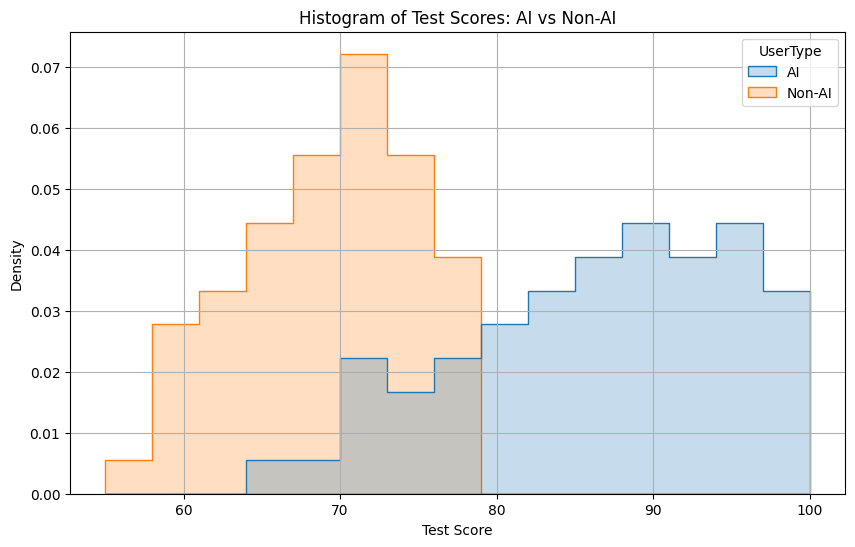

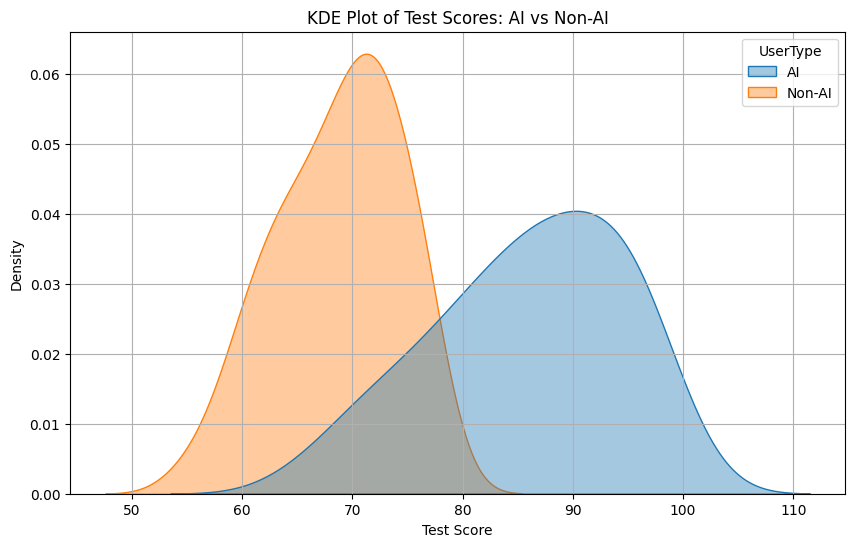

<ipython-input-192-9eade0bb55e1>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




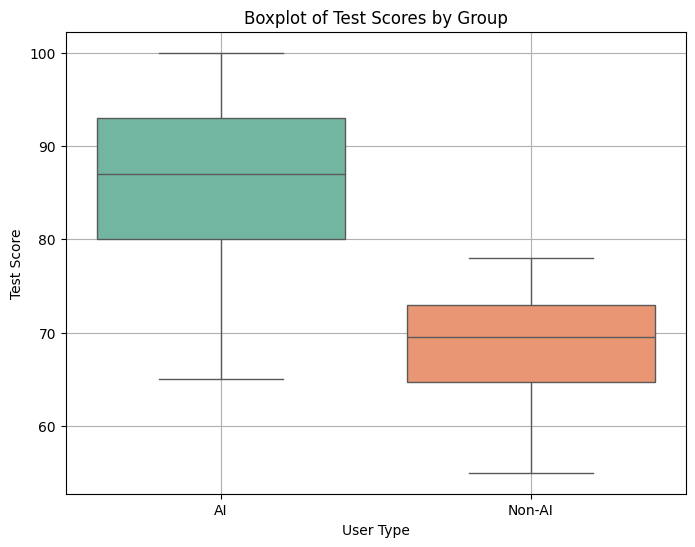

In [ ]:
# Sample synthetic data
data = {
    'UserType': ['AI'] * 20 + ['Non-AI'] * 20,
    'Test1': [65, 68, 70, 72, 74, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94] +
             [55, 58, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 72, 73, 74, 75, 76, 77],
    'Test2': [70, 72, 75, 77, 79, 81, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97] +
             [58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 70, 71, 72, 72, 73, 74, 75, 76, 77],
    'Test3': [75, 78, 80, 82, 84, 86, 88, 90, 91, 92, 93, 94, 95, 96, 96, 97, 97, 98, 99, 100] +
             [60, 62, 64, 65, 66, 67, 68, 68, 69, 70, 71, 71, 72, 73, 73, 74, 75, 76, 77, 78],
}

df = pd.DataFrame(data)
df_long = df.melt(id_vars='UserType', value_vars=['Test1', 'Test2', 'Test3'], var_name='Test', value_name='Score')

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long, x='Score', hue='UserType', element='step', stat='density', common_norm=False, bins=15)
plt.title('Histogram of Test Scores: AI vs Non-AI')
plt.xlabel('Test Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_long, x='Score', hue='UserType', fill=True, common_norm=False, alpha=0.4)
plt.title('KDE Plot of Test Scores: AI vs Non-AI')
plt.xlabel('Test Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_long, x='UserType', y='Score', palette='Set2')
plt.title('Boxplot of Test Scores by Group')
plt.xlabel('User Type')
plt.ylabel('Test Score')
plt.grid(True)
plt.show()


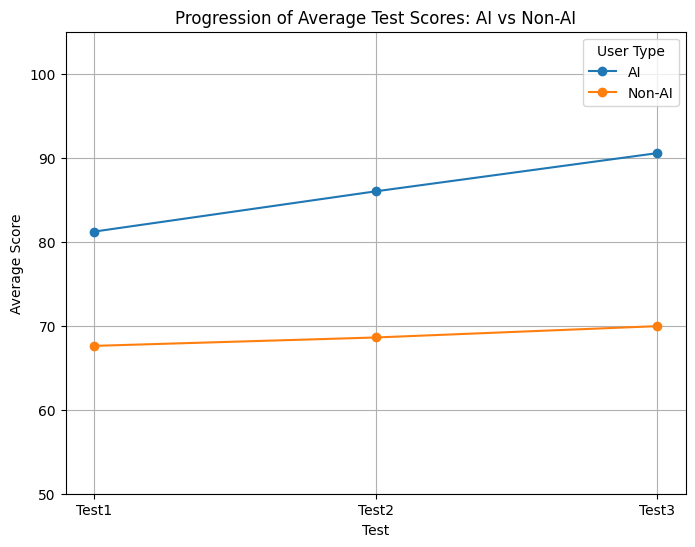

In [ ]:
# Sample synthetic data again
data = {
    'UserType': ['AI'] * 20 + ['Non-AI'] * 20,
    'Test1': [65, 68, 70, 72, 74, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94] +
             [55, 58, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 72, 73, 74, 75, 76, 77],
    'Test2': [70, 72, 75, 77, 79, 81, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97] +
             [58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 70, 71, 72, 72, 73, 74, 75, 76, 77],
    'Test3': [75, 78, 80, 82, 84, 86, 88, 90, 91, 92, 93, 94, 95, 96, 96, 97, 97, 98, 99, 100] +
             [60, 62, 64, 65, 66, 67, 68, 68, 69, 70, 71, 71, 72, 73, 73, 74, 75, 76, 77, 78],
}

df = pd.DataFrame(data)

# Melt to long format for easier grouping
df_long = df.melt(id_vars='UserType', value_vars=['Test1', 'Test2', 'Test3'],
                  var_name='Test', value_name='Score')

# Group by UserType and Test, calculate mean score
avg_scores = df_long.groupby(['UserType', 'Test'])['Score'].mean().reset_index()

# Line plot to show progression
plt.figure(figsize=(8, 6))
for group in avg_scores['UserType'].unique():
    group_data = avg_scores[avg_scores['UserType'] == group]
    plt.plot(group_data['Test'], group_data['Score'], marker='o', label=group)

plt.title('Progression of Average Test Scores: AI vs Non-AI')
plt.xlabel('Test')
plt.ylabel('Average Score')
plt.ylim(50, 105)
plt.grid(True)
plt.legend(title='User Type')
plt.show()


In [ ]:
ai_df.columns

Index(['Student #', 'Vocareum ID', 'HW 1.1', 'HW 1.2', 'HW 1.3', 'HW 1.4',
       'HW 2.1', 'HW 2.2', 'HW 2.3', 'HW 2.5', 'HW Score', 'HW GPA_Percent',
       'HW Letter Grade', 'HW 1 Test', 'HW 2 Test', 'HW 3 Test', 'HW 4 Test',
       'Midterm 1', 'Test GPA Percent', 'Test Letter Grade',
       'StudentMessageCount', 'UserType'],
      dtype='object')

In [ ]:
none_df.columns

Index(['Student #', 'Vocareum ID', 'HW 1.1', 'HW 1.2', 'HW 1.3', 'HW 1.4',
       'HW 2.1', 'HW 2.2', 'HW 2.3', 'HW 2.5', 'HW Score', 'HW GPA_Percent',
       'HW Letter Grade', 'HW 1 Test', 'HW 2 Test', 'HW 3 Test', 'HW 4 Test',
       'Midterm 1', 'Test GPA Percent', 'Test Letter Grade',
       'StudentMessageCount', 'UserType'],
      dtype='object')

In [ ]:
print(ai_df[['HW 1 Test', 'HW 2 Test', 'HW 3 Test']].isnull().sum())
print(none_df[['HW 1 Test', 'HW 2 Test', 'HW 3 Test']].isnull().sum())

HW 1 Test    0
HW 2 Test    0
HW 3 Test    0
dtype: int64
HW 1 Test    0
HW 2 Test    0
HW 3 Test    0
dtype: int64


In [ ]:
print(ai_df.columns.tolist())

['Student #', 'Vocareum ID', 'HW 1.1', 'HW 1.2', 'HW 1.3', 'HW 1.4', 'HW 2.1', 'HW 2.2', 'HW 2.3', 'HW 2.5', 'HW Score', 'HW GPA_Percent', 'HW Letter Grade', 'HW 1 Test', 'HW 2 Test', 'HW 3 Test', 'HW 4 Test', 'Midterm 1', 'Test GPA Percent', 'Test Letter Grade', 'StudentMessageCount', 'UserType']


In [ ]:
print(avg_scores)

  UserType   Test  Score
0       AI  Test1  81.20
1       AI  Test2  86.00
2       AI  Test3  90.55
3   Non-AI  Test1  67.60
4   Non-AI  Test2  68.60
5   Non-AI  Test3  69.95


## Graphs Using Math 3B Data
- Lineplot, Box Plot, ScatterPlot, Histogram

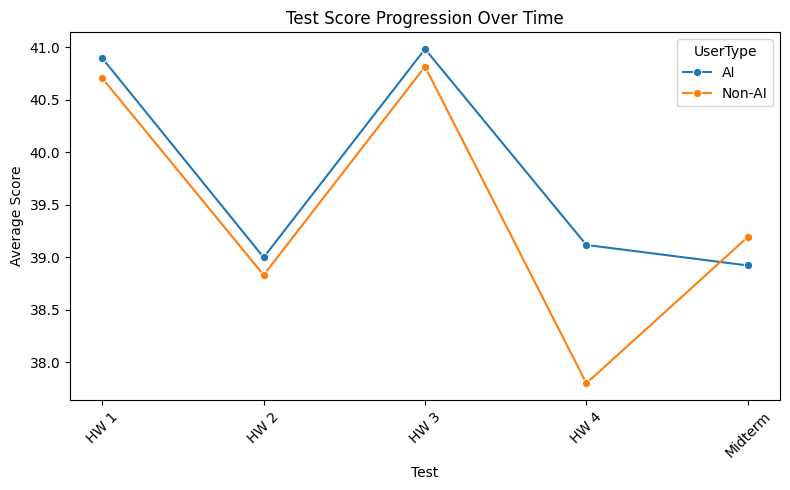

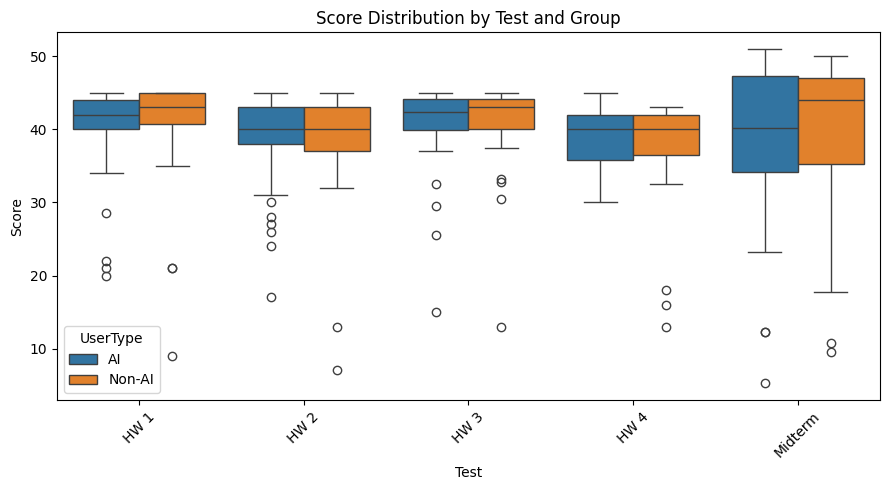

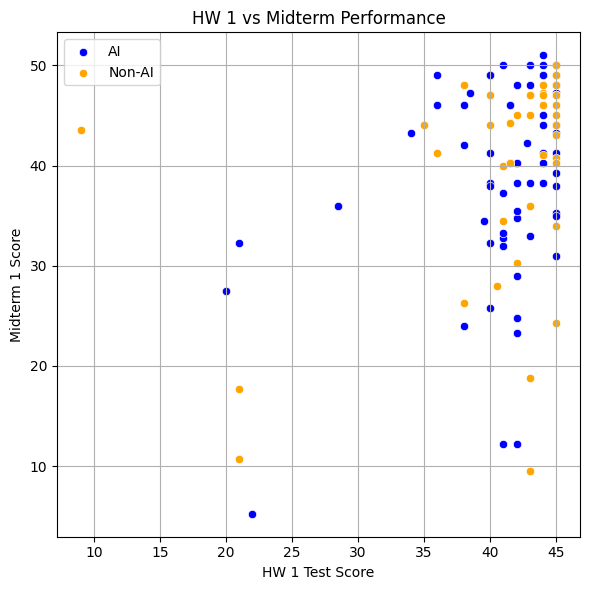

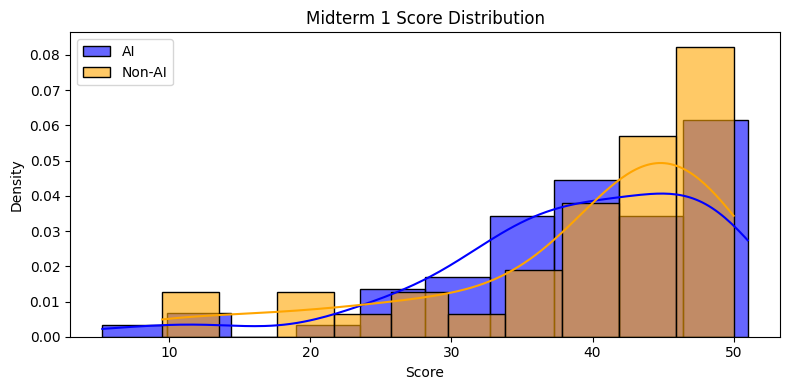

In [ ]:
# Strip extra spaces from column names
ai_df.columns = ai_df.columns.str.strip()
none_df.columns = none_df.columns.str.strip()

# Select test columns
test_cols = ['HW 1 Test', 'HW 2 Test', 'HW 3 Test', 'HW 4 Test', 'Midterm 1']

# Reshape data into long format for both groups
ai_long = ai_df[test_cols].copy()
ai_long['UserType'] = 'AI'
none_long = none_df[test_cols].copy()
none_long['UserType'] = 'Non-AI'

# Melt into long format
ai_melted = pd.melt(ai_long, id_vars='UserType', var_name='Test', value_name='Score')
none_melted = pd.melt(none_long, id_vars='UserType', var_name='Test', value_name='Score')

# Combine both
combined = pd.concat([ai_melted, none_melted], ignore_index=True)

# Clean test names (optional)
combined['Test'] = combined['Test'].str.replace(' Test', '').str.replace('Midterm 1', 'Midterm')

# 1. AVERAGE SCORES OVER TIME
plt.figure(figsize=(8, 5))
avg_scores = combined.groupby(['UserType', 'Test'])['Score'].mean().reset_index()
sns.lineplot(data=avg_scores, x='Test', y='Score', hue='UserType', marker='o')
plt.title('Test Score Progression Over Time')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. BOXPLOT OF SCORES PER TEST
plt.figure(figsize=(9, 5))
sns.boxplot(data=combined, x='Test', y='Score', hue='UserType')
plt.title('Score Distribution by Test and Group')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. SCATTERPLOT (HW 1 Test vs Midterm 1)
plt.figure(figsize=(6, 6))
sns.scatterplot(data=ai_df, x='HW 1 Test', y='Midterm 1', label='AI', color='blue')
sns.scatterplot(data=none_df, x='HW 1 Test', y='Midterm 1', label='Non-AI', color='orange')
plt.title('HW 1 vs Midterm Performance')
plt.xlabel('HW 1 Test Score')
plt.ylabel('Midterm 1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. HISTOGRAM COMPARISON OF Midterm 1
plt.figure(figsize=(8, 4))
sns.histplot(ai_df['Midterm 1'], bins=10, kde=True, color='blue', label='AI', stat='density', alpha=0.6)
sns.histplot(none_df['Midterm 1'], bins=10, kde=True, color='orange', label='Non-AI', stat='density', alpha=0.6)
plt.title('Midterm 1 Score Distribution')
plt.xlabel('Score')
plt.legend()
plt.tight_layout()
plt.show()


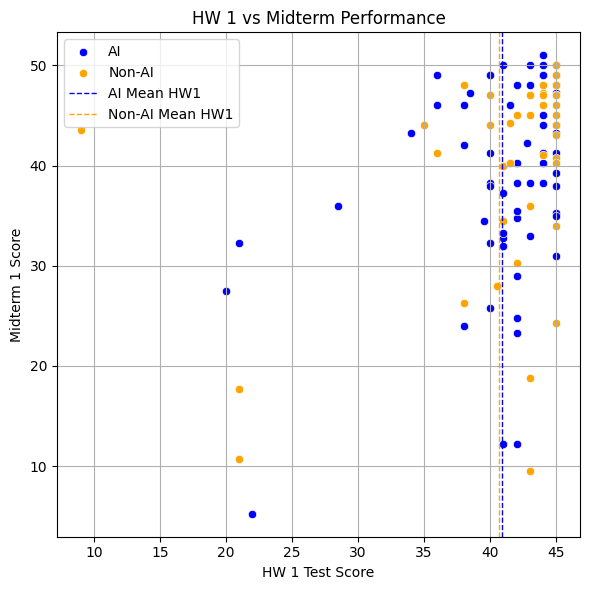

In [ ]:
# Calculate means
ai_mean = ai_df['HW 1 Test'].mean()
none_mean = none_df['HW 1 Test'].mean()

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=ai_df, x='HW 1 Test', y='Midterm 1', label='AI', color='blue')
sns.scatterplot(data=none_df, x='HW 1 Test', y='Midterm 1', label='Non-AI', color='orange')

# Add vertical lines at means
plt.axvline(x=ai_mean, color='blue', linestyle='--', linewidth=1, label='AI Mean HW1')
plt.axvline(x=none_mean, color='orange', linestyle='--', linewidth=1, label='Non-AI Mean HW1')

plt.title('HW 1 vs Midterm Performance')
plt.xlabel('HW 1 Test Score')
plt.ylabel('Midterm 1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

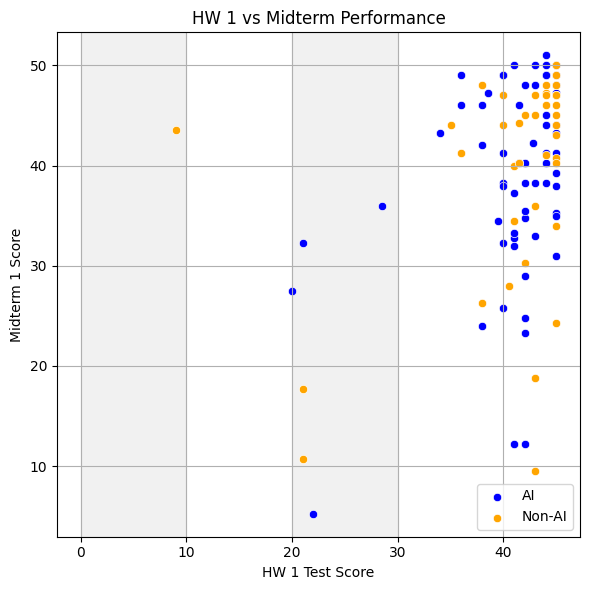

In [ ]:
# Define alternating band positions
# For example, split HW 1 Test scores into 5-point zones:
# band_edges = list(range(0, 61, 5))  # [0, 5, 10, ..., 60]
band_edges = list(range(0, 46, 10))  # Up to Max score 51 (to match midterm), steps of 10 pts

plt.figure(figsize=(6, 6))

# Alternating shaded regions
for i in range(0, len(band_edges) - 1, 2):  # Step by 2 to alternate
    plt.axvspan(band_edges[i], band_edges[i+1], color='lightgrey', alpha=0.3)

# Scatterplots
sns.scatterplot(data=ai_df, x='HW 1 Test', y='Midterm 1', label='AI', color='blue')
sns.scatterplot(data=none_df, x='HW 1 Test', y='Midterm 1', label='Non-AI', color='orange')

# Plot formatting
plt.title('HW 1 vs Midterm Performance')
plt.xlabel('HW 1 Test Score')
plt.ylabel('Midterm 1 Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Homework 4 has the highest difference as seen from prior histogram graph. Compare to Midterm

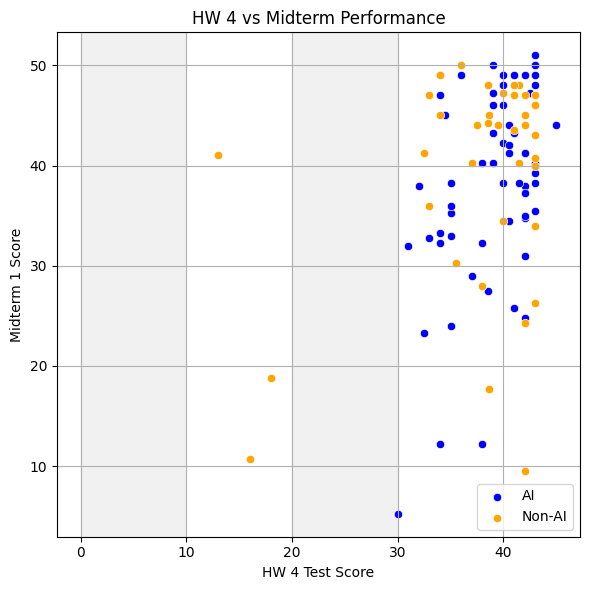

In [ ]:
band_edges = list(range(0, 46, 10))  # Up to Max HW Test score, steps of 10 pts

plt.figure(figsize=(6, 6))

# Alternating shaded regions
for i in range(0, len(band_edges) - 1, 2):  # Step by 2 to alternate
    plt.axvspan(band_edges[i], band_edges[i+1], color='lightgrey', alpha=0.3)

# Scatterplots
sns.scatterplot(data=ai_df, x='HW 4 Test', y='Midterm 1', label='AI', color='blue')
sns.scatterplot(data=none_df, x='HW 4 Test', y='Midterm 1', label='Non-AI', color='orange')

# Plot formatting
plt.title('HW 4 vs Midterm Performance')
plt.xlabel('HW 4 Test Score')
plt.ylabel('Midterm 1 Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Comparing Hi Scoring Students
- Histogram shows possible deviation for Midterm scores > ~42 (and < 42)
- Separate two 'types of scorers' and compare
- Check for "> 1, 2, or 3" std dev from the mean

In [ ]:
ai_hi = ai_df[ai_df['Midterm 1'] >= 42]
none_hi = none_df[none_df['Midterm 1'] >= 42]

In [ ]:
# AI Users - High Scores
ai_hi_mean = ai_hi['Midterm 1'].mean()
ai_hi_std = ai_hi['Midterm 1'].std()  # This is sample std dev (n-1)
ai_hi_sem = ai_hi['Midterm 1'].sem()  # Standard Error of the Mean

# Non-AI Users - High Scores
none_hi_mean = none_hi['Midterm 1'].mean()
none_hi_std = none_hi['Midterm 1'].std()
none_hi_sem = none_hi['Midterm 1'].sem()

print(ai_hi_mean, ai_hi_std, ai_hi_sem)
print(none_hi_mean, none_hi_std, none_hi_sem)

47.125 2.577951383043003 0.4871870179676286
46.13636363636363 1.9082017100489577 0.4068299715334386


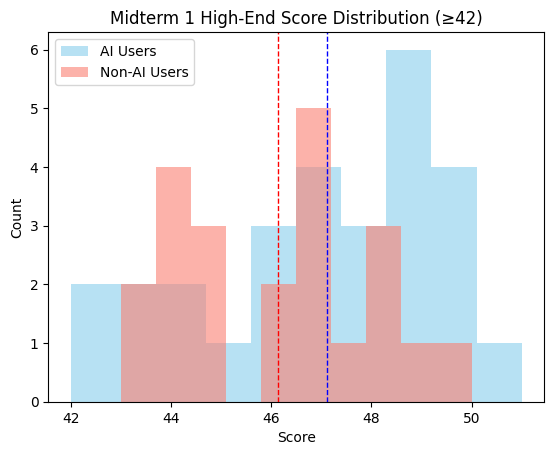

In [ ]:
plt.hist(ai_hi['Midterm 1'], bins=10, alpha=0.6, label='AI Users', color='skyblue')
plt.hist(none_hi['Midterm 1'], bins=10, alpha=0.6, label='Non-AI Users', color='salmon')
plt.axvline(ai_hi_mean, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(none_hi_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Midterm 1 High-End Score Distribution (≥42)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
ai_low = ai_df[ai_df['Midterm 1'] < 42]
none_low = none_df[none_df['Midterm 1'] < 42]

In [ ]:
# AI Users - Low Scores
ai_low_mean = ai_low['Midterm 1'].mean()
ai_low_std = ai_low['Midterm 1'].std()  # This is sample std dev (n-1)
ai_low_sem = ai_low['Midterm 1'].sem()  # Standard Error of the Mean

# Non-AI Users - Low Scores
none_low_mean = none_low['Midterm 1'].mean()
none_low_std = none_low['Midterm 1'].std()
none_low_sem = none_low['Midterm 1'].sem()

print(ai_low_mean.round(2), ai_low_std, ai_low_sem)
print(none_low_mean, none_low_std, none_low_sem)

print("Mean: ", round(ai_low_mean, 2), ", Std Dev: ", round(ai_low_std, 2),", Error: ", round(ai_low_sem, 2))
print("Mean: ", round(none_low_mean, 2), ", Std Dev: ", round(none_low_std, 2),", Error: ", round(none_low_sem, 2))

32.54 8.588509765960564 1.4314182943267608
30.205882352941178 10.791792053931271 2.6173940310623522
Mean:  32.54 , Std Dev:  8.59 , Error:  1.43
Mean:  30.21 , Std Dev:  10.79 , Error:  2.62


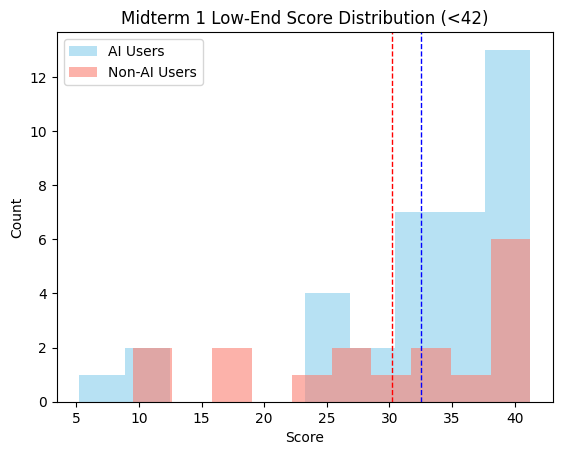

In [ ]:
plt.hist(ai_low['Midterm 1'], bins=10, alpha=0.6, label='AI Users', color='skyblue')
plt.hist(none_low['Midterm 1'], bins=10, alpha=0.6, label='Non-AI Users', color='salmon')
plt.axvline(ai_low_mean, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(none_low_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Midterm 1 Low-End Score Distribution (<42)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend()
plt.show()

## Independent T-Tests

p-value < 0.05: Statistically significant → the groups are likely different

p-value ≥ 0.05: Not statistically significant → the observed difference might be due to chance

In [ ]:
# Midterm 1 values from both high-scoring groups (AI vs. non)
t_stat, p_value = ttest_ind(ai_hi['Midterm 1'], none_hi['Midterm 1'], equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.5576092847583827
p-value: 0.12591439652187655


In [ ]:
# Midterm 1 values from both low-scoring groups
t_stat, p_value = ttest_ind(ai_low['Midterm 1'], none_low['Midterm 1'], equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.7829694439105137
p-value: 0.4407348254918946


### An additional P-Test can be used for the second most apparent difference: HW Test 4 Grades

In [ ]:
# Midterm 1 values from both low-scoring groups
t_stat, p_value = ttest_ind(ai_df['HW 4 Test'], none_df['HW 4 Test'], equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.0544715308099943
p-value: 0.2967258279546521


# No Statistical Difference
- Found 0.12 for at Hi end of Midterm scores, 0.44 at Low end, and 0.29 for HW 4 Test
- \> 0.05 threshold => No Statistical Difference

# DOES AI USAGE CORRELATE WITH TEST PERFORMANCE?

In [ ]:
ai_usage = pd.DataFrame(ai_df.copy())
none_usage = pd.DataFrame(none_df.copy())

In [ ]:
# Create Usage Tiers (for AI users only):
ai_usage['UsageLevel'] = pd.qcut(ai_usage['StudentMessageCount'], q=3, labels=['Low', 'Medium', 'High'])
ai_usage.head(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount,UserType,UsageLevel
0,4,178739370,10.0,9.0,9.0,10.0,6.0,8.0,6.0,18.0,...,42.8,34.0,25.5,40.0,42.25,81.3,B-,35,AI,High
1,5,179357400,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,45.0,39.0,41.5,39.0,47.25,92.1,A-,19,AI,High
2,6,178739730,10.0,9.0,8.0,8.0,6.0,8.0,7.0,18.0,...,42.0,40.5,42.5,38.0,12.25,50.6,F,11,AI,Medium


In [ ]:
# Add "Used AI" column - Naah, second thought, already covered with UserType: AI/Non-AI
# ai_usage['UsedAI'] = True
# none_usage['UsedAI'] = False

In [ ]:
# Combine both datasets:
combined_usage_df = pd.concat([ai_usage, none_usage], ignore_index=True)
combined_usage_df.tail(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount,UserType,UsageLevel
100,135,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,41.5,40.0,43.2,37.0,40.25,83.3,B,0,Non-AI,NaN
101,138,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,45.0,44.0,44.2,34.0,49.00,94.8,A,0,Non-AI,NaN
102,140,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,45.0,45.0,41.0,41.0,48.00,94.7,A,0,Non-AI,NaN


### Our categories can only include 3 types for Usage Level: Low, Medium, High.
- Since we want to add our non-users to the list, and give them "None" in the Usage Level category => add a 4th option

In [ ]:
# Step 1: Add 'None' as a valid category
combined_usage_df['UsageLevel'] = combined_usage_df['UsageLevel'].cat.add_categories('None')

# Step 2: Fill NaNs with 'None'
combined_usage_df['UsageLevel'] = combined_usage_df['UsageLevel'].fillna('None')

combined_usage_df.tail(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount,UserType,UsageLevel
100,135,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,41.5,40.0,43.2,37.0,40.25,83.3,B,0,Non-AI,None
101,138,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,45.0,44.0,44.2,34.0,49.00,94.8,A,0,Non-AI,None
102,140,NaN,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,45.0,45.0,41.0,41.0,48.00,94.7,A,0,Non-AI,None


## BOXPLOT
- This shows the MEDIAN for the line in the middle

<ipython-input-217-b3b71a998cdb>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




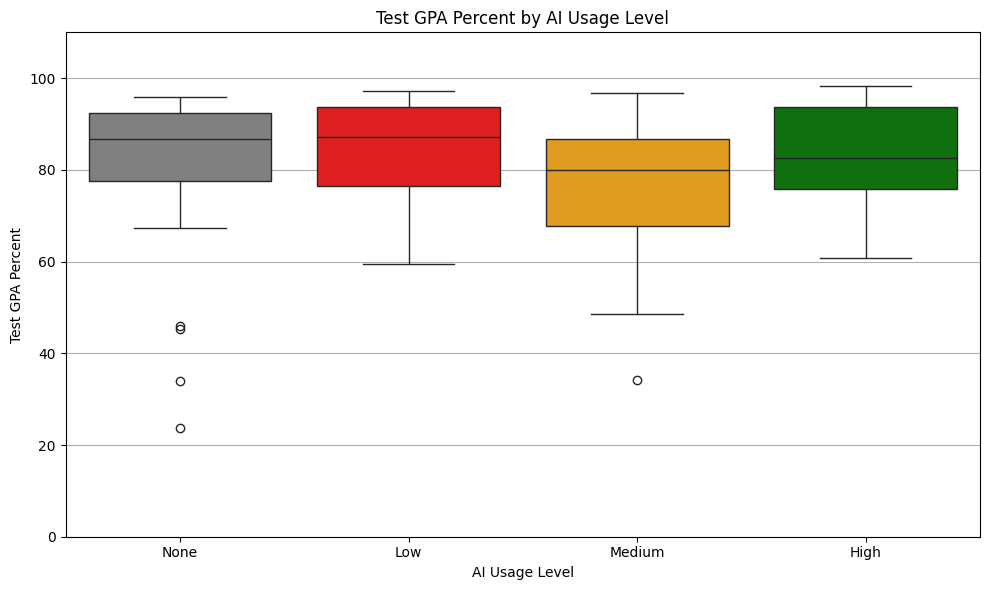

In [ ]:
# Manually set color palette
color_map = {
    'None': 'grey',
    'Low': 'red',
    'Medium': 'orange',
    'High': 'green'
}

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=combined_usage_df,
    x='UsageLevel',
    y='Test GPA Percent',
    palette=color_map,
    order=['None', 'Low', 'Medium', 'High']
)

plt.title('Test GPA Percent by AI Usage Level')
plt.xlabel('AI Usage Level')
plt.ylabel('Test GPA Percent')
plt.ylim(0, 110)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## BAR PLOT
- Shows the MEAN at the top of the box
- Note that LOWER SCORES affect the MEAN more
- View that the Top of bar here for None, ~80%, is slightly lower than the MEAN bar of prior Box Plot, ~84%

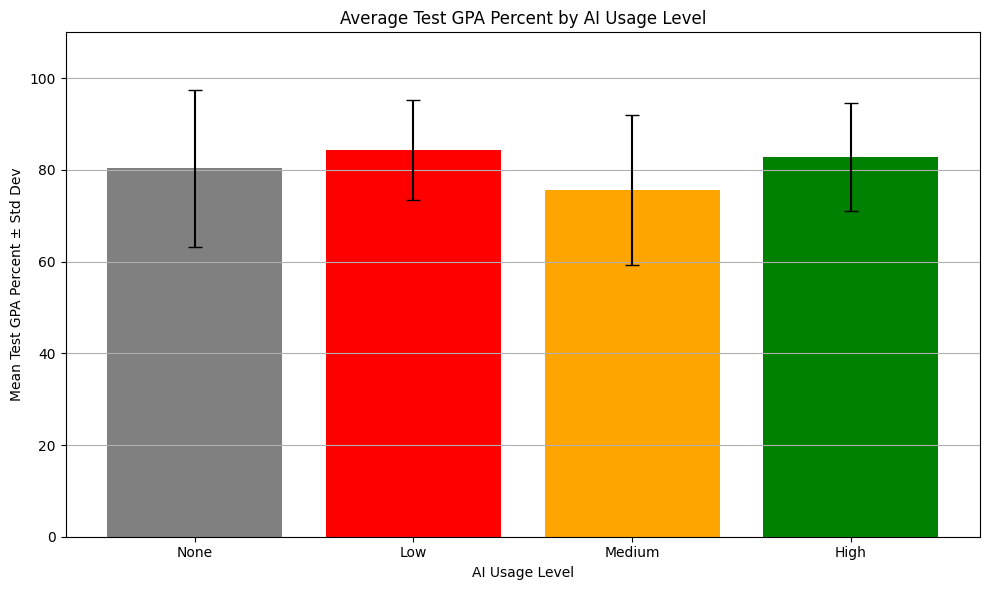

In [ ]:
# Group by usage level and calculate mean and std
usage_summary = combined_usage_df.groupby('UsageLevel', observed=True)['Test GPA Percent'].agg(['mean', 'std']).reindex(['None', 'Low', 'Medium', 'High'])

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    usage_summary.index,
    usage_summary['mean'],
    yerr=usage_summary['std'],
    capsize=5,
    color=[color_map[x] for x in usage_summary.index]
)

plt.title('Average Test GPA Percent by AI Usage Level')
plt.xlabel('AI Usage Level')
plt.ylabel('Mean Test GPA Percent ± Std Dev')
plt.ylim(0, 110)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# PYVIS
- Attempted, but Unused
- Must pip install pyvis on first run-through, then can comment

In [ ]:
!pip install pyvis
from pyvis.network import Network

# Example synthetic data
num_students = 50
df = pd.DataFrame({
    'StudentID': [f"S{i}" for i in range(1, num_students + 1)],
    'StudentMessageCount': [random.randint(0, 300) for _ in range(num_students)],
    'Test GPA Percent': [random.uniform(50, 100) for _ in range(num_students)],
    'LetterGrade': [random.choice(['A', 'B', 'C', 'D', 'F']) for _ in range(num_students)]
})
df['NodeSize'] = df['Test GPA Percent']  # Scale node size

net = Network(notebook=True, height="600px", width="100%", bgcolor="#222222", font_color="white")

# Add nodes
for i, row in df.iterrows():
    net.add_node(
        row['StudentID'],
        title=f"GPA: {row['Test GPA Percent']:.1f}%\nGrade: {row['LetterGrade']}\nMsgs: {row['StudentMessageCount']}",
        value=row['NodeSize'],
        color={
            'A': 'green',
            'B': 'lightgreen',
            'C': 'yellow',
            'D': 'orange',
            'F': 'red'
        }[row['LetterGrade']]
    )

# Optionally, add similarity-based edges
for i in range(num_students):
    for j in range(i + 1, num_students):
        diff = abs(df.loc[i, 'Test GPA Percent'] - df.loc[j, 'Test GPA Percent'])
        if diff < 5:  # Similar GPA
            net.add_edge(df.loc[i, 'StudentID'], df.loc[j, 'StudentID'])

net.show("student_network.html")


student_network.html


# PLOTLY
- Attempt several visualizations with different size, color, and axes
- The only one used is the final one (RGB and Grey, Messages vs. GPA)

In [ ]:
df['TotalScore'] = df['Test GPA Percent'] * random.uniform(1.0, 1.2)  # Just sample logic
fig = px.scatter(df,
                 x="StudentMessageCount",
                 y="Test GPA Percent",
                 size="TotalScore",
                 color="LetterGrade",
                 hover_data=["StudentID", "TotalScore"])
fig.update_layout(title="AI Usage vs GPA Performance", height=600)
fig.show()

In [ ]:
import plotly.express as px

plotly_df = pd.DataFrame(combined_usage_df.copy())
plotly_df['TotalScore'] = plotly_df['Test GPA Percent'] * plotly_df['StudentMessageCount']
fig = px.scatter(plotly_df,
                 x="StudentMessageCount",
                 y="Test GPA Percent",
                 size="TotalScore",
                 color="Test Letter Grade",
                 hover_data=["Student #", "TotalScore"])
fig.update_layout(title="AI Usage vs GPA Performance", height=600)
fig.show()

In [ ]:
plotly_df.columns

Index(['Student #', 'Vocareum ID', 'HW 1.1', 'HW 1.2', 'HW 1.3', 'HW 1.4',
       'HW 2.1', 'HW 2.2', 'HW 2.3', 'HW 2.5', 'HW Score', 'HW GPA_Percent',
       'HW Letter Grade', 'HW 1 Test', 'HW 2 Test', 'HW 3 Test', 'HW 4 Test',
       'Midterm 1', 'Test GPA Percent', 'Test Letter Grade',
       'StudentMessageCount', 'UserType', 'UsageLevel', 'TotalScore'],
      dtype='object')

In [ ]:
import plotly.express as px

plotly_df = pd.DataFrame(combined_usage_df.copy())
plotly_df['PlotlyAdd'] = plotly_df['StudentMessageCount'] + 5 # To show the NoAI data
fig = px.scatter(plotly_df,
                 x="Test GPA Percent",
                 y="Test Letter Grade",
                 size="PlotlyAdd",
                 color="UsageLevel",
                 hover_data=["Student #", "StudentMessageCount"])
fig.update_layout(title="AI Usage vs GPA Performance", height=600)
fig.show()

In [ ]:
plotly_df.head(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount,UserType,UsageLevel,PlotlyAdd
0,4,178739370.0,10.0,9.0,9.0,10.0,6.0,8.0,6.0,18.0,...,34.0,25.5,40.0,42.25,81.3,B-,35,AI,High,40
1,5,179357400.0,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,39.0,41.5,39.0,47.25,92.1,A-,19,AI,High,24
2,6,178739730.0,10.0,9.0,8.0,8.0,6.0,8.0,7.0,18.0,...,40.5,42.5,38.0,12.25,50.6,F,11,AI,Medium,16


In [ ]:
import pandas as pd
import plotly.express as px

# Copy your dataframe
plotly_df = pd.DataFrame(combined_usage_df.copy())
plotly_df['PlotlyAdd'] = (plotly_df['StudentMessageCount'] + 10) / 2

# Define the correct grade order (top to bottom)
grade_order = ["A+", "A", "A-",
               "B+", "B", "B-",
               "C+", "C", "C-",
               "D+", "D", "D-",
               "F"]

# Assign as ordered categorical
plotly_df["Test Letter Grade"] = pd.Categorical(
    plotly_df["Test Letter Grade"],
    categories=grade_order,
    ordered=True
)

# Now plot and specify the y-axis category order
fig = px.scatter(
    plotly_df,
    x="Test GPA Percent",
    y="Test Letter Grade",
    size="PlotlyAdd",
    color="UsageLevel",
    hover_data=["Student #", "StudentMessageCount"],
    category_orders={"Test Letter Grade": grade_order}  # <-- Force correct order here
)

fig.update_layout(
    title="AI Usage vs GPA Performance",
    height=600,
    yaxis_title="Letter Grade"
)

fig.show()


In [ ]:
plotly_df.head(3)

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,...,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,Test Letter Grade,StudentMessageCount,UserType,UsageLevel,PlotlyAdd
0,4,178739370.0,10.0,9.0,9.0,10.0,6.0,8.0,6.0,18.0,...,34.0,25.5,40.0,42.25,81.3,B-,35,AI,High,22.5
1,5,179357400.0,10.0,9.0,9.0,10.0,6.0,8.0,7.0,18.0,...,39.0,41.5,39.0,47.25,92.1,A-,19,AI,High,14.5
2,6,178739730.0,10.0,9.0,8.0,8.0,6.0,8.0,7.0,18.0,...,40.5,42.5,38.0,12.25,50.6,F,11,AI,Medium,10.5


In [ ]:
# Code with updated markers for letters
import pandas as pd
import plotly.express as px

# Copy your dataframe
plotly_df = pd.DataFrame(combined_usage_df.copy())

# Grade to numeric size map
grade_size_map = {
    "A+": 13, "A": 12, "A-": 11,
    "B+": 10, "B": 9, "B-": 8,
    "C+": 7, "C": 6, "C-": 5,
    "D+": 4, "D": 3, "D-": 2,
    "F": 1
}

# Add numeric size column
plotly_df["GradeSize"] = plotly_df["Test Letter Grade"].map(grade_size_map)

# Ensure GPA Percent is numeric
plotly_df["Test GPA Percent"] = pd.to_numeric(plotly_df["Test GPA Percent"], errors="coerce")

# Plot!
fig = px.scatter(
    plotly_df,
    x="Test GPA Percent",
    y="StudentMessageCount",
    size="GradeSize",
    color="UsageLevel",
    hover_data=["Student #", "Test Letter Grade", "StudentMessageCount"],
    labels={"StudentMessageCount": "AI Message Count"}
)

fig.update_layout(
    title="AI Usage vs GPA Performance (Marker Size = Letter Grade)",
    height=600,
    yaxis_title="AI Messages Sent",
    xaxis_title="GPA Percent"
)

fig.show()


# Final Plotly Visualization
- Uses colormap to match Usage cases (none, low, medium, high) with prior Box/Bar charts (grey, red, orange, green)

In [ ]:
# Color mapping consistent with your other plots
custom_color_map = {
    "None": "#808080",     # Gray
    "Low": "#e74c3c",      # Red
    "Medium": "#f39c12",   # Orange
    "High": "#27ae60"      # Green
}

# Code with updated markers for letters
import pandas as pd
import plotly.express as px

# Copy your dataframe
plotly_df = pd.DataFrame(combined_usage_df.copy())

# Grade to numeric size map
grade_size_map = {
    "A+": 13, "A": 12, "A-": 11,
    "B+": 10, "B": 9, "B-": 8,
    "C+": 7, "C": 6, "C-": 5,
    "D+": 4, "D": 3, "D-": 2,
    "F": 1
}

# Add numeric size column
plotly_df["GradeSize"] = plotly_df["Test Letter Grade"].map(grade_size_map)

# Ensure GPA Percent is numeric
plotly_df["Test GPA Percent"] = pd.to_numeric(plotly_df["Test GPA Percent"], errors="coerce")

# Plot!
fig = px.scatter(
    plotly_df,
    x="Test GPA Percent",
    y="StudentMessageCount",
    size="GradeSize",
    color="UsageLevel",
    hover_data=["Student #", "Test Letter Grade", "StudentMessageCount"],
    color_discrete_map=custom_color_map,  # Use colormap to match (grey > red > orange > green) with other box/bar charts
    labels={"StudentMessageCount": "AI Message Count"}
)

fig.update_layout(
    title="AI Usage vs GPA Performance (Marker Size = Letter Grade)",
    height=600,
    yaxis_title="AI Messages Sent",
    xaxis_title="GPA Percent"
)

fig.show()

# DETAILS ON MAIN TYPES OF STUDENTS
- No AI vs. AI users

In [ ]:
ai_df.describe()

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,HW Score,HW GPA_Percent,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,StudentMessageCount
count,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,70.671875,1.780991e+08,9.933066,8.983275,8.871347,9.751015,5.935471,7.882711,6.949747,17.801098,76.107812,98.840625,40.895313,38.998438,40.982813,39.117188,38.921875,81.203125,11.281250
std,42.050255,4.409748e+06,0.393198,0.124918,0.417248,0.524387,0.301897,0.440149,0.212695,0.498339,1.953694,2.540261,5.393689,5.630853,4.890144,3.678274,9.848644,13.421955,16.048012
min,4.000000,1.537892e+08,7.000000,8.000000,7.000000,8.000000,4.000000,5.000000,6.000000,16.000000,67.000000,87.000000,20.000000,17.000000,15.000000,30.000000,5.250000,34.200000,1.000000
25%,29.750000,1.787409e+08,10.000000,9.000000,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,76.000000,98.700000,40.000000,38.000000,39.875000,35.750000,34.187500,74.525000,2.000000
50%,75.500000,1.787430e+08,10.000000,9.000000,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,77.000000,100.000000,42.000000,40.000000,42.350000,40.000000,40.250000,83.100000,4.500000
75%,107.250000,1.787444e+08,10.000000,9.000000,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,77.000000,100.000000,44.000000,43.000000,44.200000,42.000000,47.250000,92.150000,15.000000
max,137.000000,1.798767e+08,10.000000,9.000000,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,77.000000,100.000000,45.000000,45.000000,45.000000,45.000000,51.000000,98.400000,94.000000


In [ ]:
none_df.describe()

,Student #,Vocareum ID,HW 1.1,HW 1.2,HW 1.3,HW 1.4,HW 2.1,HW 2.2,HW 2.3,HW 2.5,HW Score,HW GPA_Percent,HW 1 Test,HW 2 Test,HW 3 Test,HW 4 Test,Midterm 1,Test GPA Percent,StudentMessageCount
count,39.000000,0.0,39.0,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,75.948718,NaN,10.0,9.0,8.555207,9.500785,5.945513,7.895385,6.945578,17.645128,75.487179,98.030769,40.705128,38.830769,40.815385,37.800000,39.192308,80.356410,0.0
std,37.398951,NaN,0.0,0.0,1.712221,1.446419,0.222984,0.306919,0.223135,1.178694,3.498885,4.550370,7.569605,7.718132,5.739500,7.253239,10.728170,17.140607,0.0
min,8.000000,NaN,10.0,9.0,0.000000,3.000000,5.000000,7.000000,6.000000,11.000000,60.000000,77.900000,9.000000,7.000000,13.000000,13.000000,9.500000,23.800000,0.0
25%,49.000000,NaN,10.0,9.0,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,76.000000,98.700000,40.750000,37.000000,40.000000,36.500000,35.250000,77.600000,0.0
50%,70.000000,NaN,10.0,9.0,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,77.000000,100.000000,43.000000,40.000000,43.000000,40.000000,44.000000,86.800000,0.0
75%,105.500000,NaN,10.0,9.0,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,77.000000,100.000000,45.000000,43.000000,44.200000,42.000000,47.000000,92.350000,0.0
max,140.000000,NaN,10.0,9.0,9.000000,10.000000,6.000000,8.000000,7.000000,18.000000,77.000000,100.000000,45.000000,45.000000,45.000000,43.000000,50.000000,96.000000,0.0
